In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('gse120124ts&cdkn2anoHLT.csv',header=0)

In [3]:
df=df.sort_values(['TYMS']).reset_index(drop=True)

In [4]:
df.head()

,Tissue,TYMS,CDKN2A
0,Follicular,6.91098,4.40688
1,ABC DLBCL,7.34906,5.02990
2,Mantle,7.36311,4.82840
3,Follicular,7.40885,5.14940
4,Follicular,7.43995,5.00849


In [5]:
# t test show the difference of expression
from scipy import stats
from scipy.stats import ttest_ind
ttest_ind(df['TYMS'], df['CDKN2A'])

Ttest_indResult(statistic=26.277041806700602, pvalue=2.59898579541299e-35)

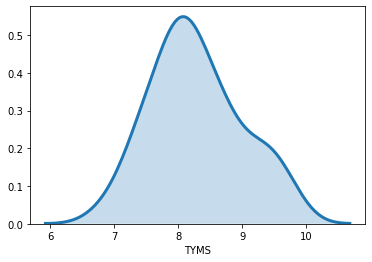

In [6]:
#density plot for tyms
sns.distplot(df['TYMS'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

,TYMS,CDKN2A
TYMS,1.000000,0.101882
CDKN2A,0.101882,1.000000


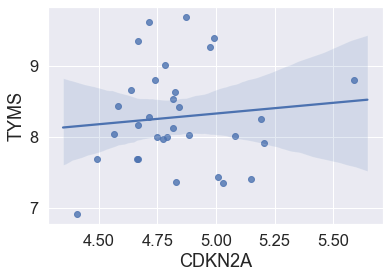

In [20]:
sns.regplot(x="CDKN2A", y="TYMS",  data=df)
plt.savefig('regression.png')
df.corr()
#do not show correlation between two genes

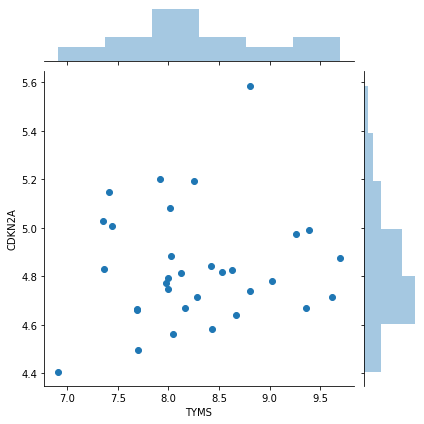

In [8]:
sns.jointplot(x="TYMS", y="CDKN2A", data=df);

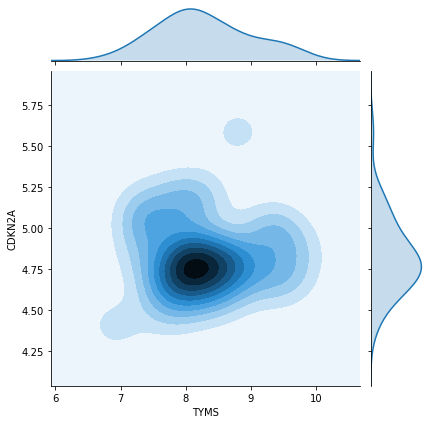

In [9]:
sns.jointplot(x="TYMS", y="CDKN2A", data=df, kind="kde")

Text(0, 0.5, 'Density')

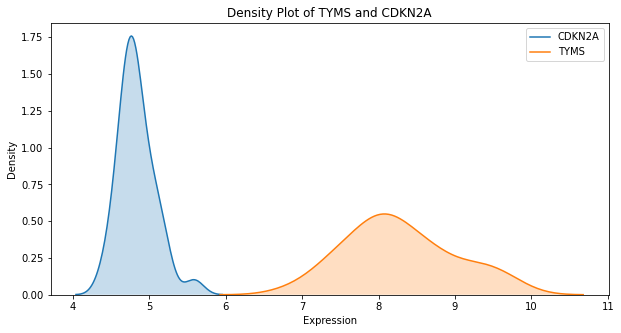

In [10]:
plt.figure(figsize = (10,5))
sns.kdeplot(df["CDKN2A"],  shade=True,label="CDKN2A")
sns.kdeplot(df["TYMS"], shade=True, label="TYMS")
plt.legend()
plt.title('Density Plot of TYMS and CDKN2A')
plt.xlabel('Expression')
plt.ylabel('Density')


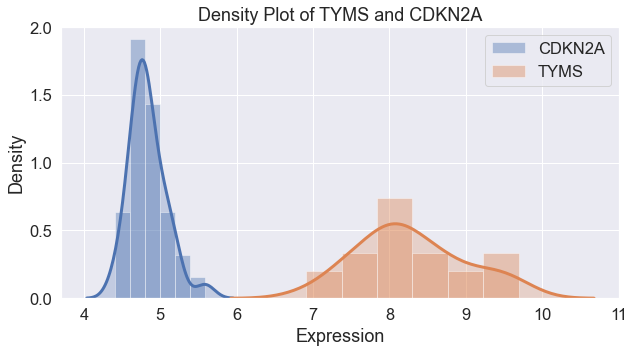

In [21]:
plt.figure(figsize = (10,5))
sns.distplot(df["CDKN2A"],   hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
             label="CDKN2A"                 )
sns.distplot(df["TYMS"],   hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
             label="TYMS"                 )
plt.legend()
plt.title('Density Plot of TYMS and CDKN2A')
plt.xlabel('Expression')
plt.ylabel('Density')
plt.savefig('densityPlot.png')

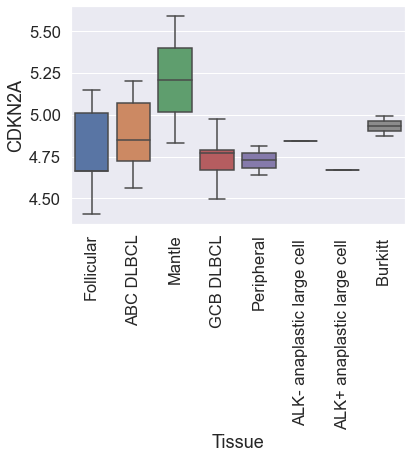

In [22]:
ax=sns.boxplot( x="Tissue",  y="CDKN2A", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.savefig('boxplotCDKN2A.png')

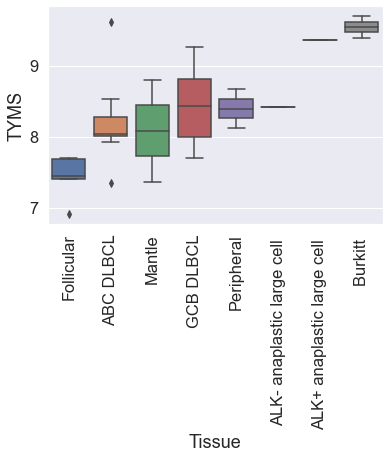

In [23]:
ax=sns.boxplot( x="Tissue",  y="TYMS", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.savefig('boxplotTYMS.png')

In [14]:
#melt columns for catplot
dfm=pd.read_csv('gse120124ts&cdkn2a noHL.csv',header=0)
dfm = dfm.melt('!Sample_title').sort_values('!Sample_title')
dfm=dfm.rename(columns = {'!Sample_title': 'Sample', 'variable':'Gene', 'value':'Expression'})

dfm=dfm.sort_values('Sample').reset_index(drop=True)
dfm.head()

,Sample,Gene,Expression
0,ABC DLBCL patient_14T024678,TYMS,8.53150
1,ABC DLBCL patient_14T024678,CDKN2A,4.81597
2,ABC DLBCL patient_15T011542,CDKN2A,5.02990
3,ABC DLBCL patient_15T011542,TYMS,7.34906
4,ABC DLBCL patient_PP12009422,TYMS,7.99911


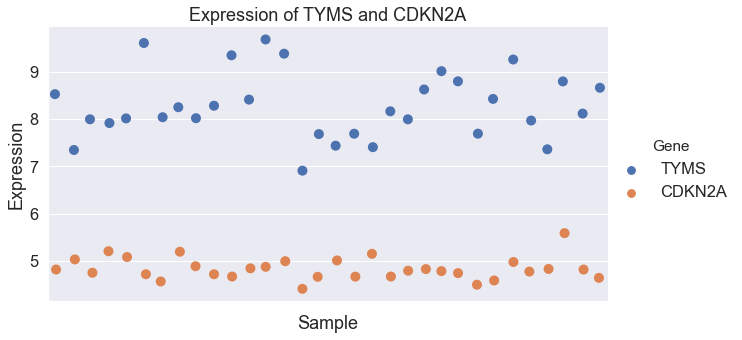

In [24]:
sns.set(font_scale = 1.5)
chart=sns.catplot(x="Sample",y="Expression",  hue="Gene", s=10, data=dfm, height=5, aspect=2)
#chart.set(xlabel=None)
chart.set_xticklabels([]) # the label is not necessary
plt.title('Expression of TYMS and CDKN2A')
plt.savefig('dotplot.png')

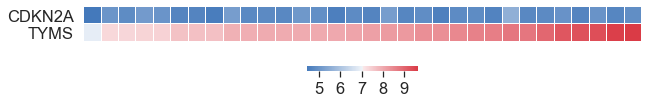

<Figure size 432x288 with 0 Axes>

In [16]:
#arrage data for heatmap
dfr=df[['CDKN2A','TYMS']]
dfr=dfr.T
dfr

plt.figure(figsize = (10,3))
sns.set(font_scale = 1.5)
sns.heatmap(dfr, square=True,linewidths=0.01, xticklabels=False,linecolor='white',
            cmap=sns.diverging_palette(250, 10, sep=2, as_cmap=True),
            cbar_kws  = {"orientation":"horizontal", 
            "shrink":0.2}) 
plt.yticks(rotation=0) 
plt.show()
plt.savefig('heatMap.png')